Q2. Kaggle Competition:

Introduction: You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition.

Description: Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Kaggle Competition Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print("Shape of training data is: ",train_data.shape)
print("shape of testing data is: ",test_data.shape)

Shape of training data is:  (1460, 81)
shape of testing data is:  (1459, 80)


# Data Cleaning

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.duplicated().sum()

0

In [8]:
test_data.duplicated().sum()

0

In [9]:
pd.set_option('display.max_columns',81)
pd.set_option('display.max_rows',81)

In [10]:
train_data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

First cleaning the training data

In [11]:
isnull_train_col = train_data.isnull().columns
j=0
for i in train_data.isnull().sum():
    percentage = i/1460 * 100
    print(f'{isnull_train_col[j]} missing % is: {percentage}')
    j+=1

Id missing % is: 0.0
MSSubClass missing % is: 0.0
MSZoning missing % is: 0.0
LotFrontage missing % is: 17.73972602739726
LotArea missing % is: 0.0
Street missing % is: 0.0
Alley missing % is: 93.76712328767123
LotShape missing % is: 0.0
LandContour missing % is: 0.0
Utilities missing % is: 0.0
LotConfig missing % is: 0.0
LandSlope missing % is: 0.0
Neighborhood missing % is: 0.0
Condition1 missing % is: 0.0
Condition2 missing % is: 0.0
BldgType missing % is: 0.0
HouseStyle missing % is: 0.0
OverallQual missing % is: 0.0
OverallCond missing % is: 0.0
YearBuilt missing % is: 0.0
YearRemodAdd missing % is: 0.0
RoofStyle missing % is: 0.0
RoofMatl missing % is: 0.0
Exterior1st missing % is: 0.0
Exterior2nd missing % is: 0.0
MasVnrType missing % is: 0.547945205479452
MasVnrArea missing % is: 0.547945205479452
ExterQual missing % is: 0.0
ExterCond missing % is: 0.0
Foundation missing % is: 0.0
BsmtQual missing % is: 2.5342465753424657
BsmtCond missing % is: 2.5342465753424657
BsmtExposure mi

In [12]:
drop_col_train = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for i in drop_col_train:
    train_data.drop(labels=i,axis=1,inplace=True)

In [13]:
find_data_type_train = ['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure',
                        'BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt',
                        'GarageFinish','GarageQual','GarageCond']
cat_train=[]
num_train=[]
for i in find_data_type_train:
    if train_data[i].dtype == 'object':
        cat_train.append(i)
    else:
        num_train.append(i)

In [14]:
cat_train

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [15]:
num_train

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
# Dealing with categorical columns in training
for i in cat_train:
    freq = train_data[i].mode()[0]
    train_data[i] = train_data[i].fillna(freq)
    
# Dealing with numerical columns in training
for j in num_train:
    avg = train_data[j].mean()
    train_data[j].replace(np.nan,avg,inplace =True)

Repeating all the above steps for testing data

In [17]:
test_data.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageCond         78
GarageQual         78
GarageYrBlt        78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
Exterior1st         1
KitchenQual         1
GarageArea          1
GarageCars          1
HouseStyle          0
LandSlope           0
MSSubClass          0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
BldgType            0
Condition1          0
Condition2          0
RoofMatl  

In [18]:
# Now do the same for test data
isnull_test_col = test_data.isnull().columns
j=0
for i in test_data.isnull().sum():
    percentage = i/1460 * 100
    print(f'{isnull_test_col[j]} missing % is:  {percentage}')
    j+=1

Id missing % is:  0.0
MSSubClass missing % is:  0.0
MSZoning missing % is:  0.273972602739726
LotFrontage missing % is:  15.547945205479452
LotArea missing % is:  0.0
Street missing % is:  0.0
Alley missing % is:  92.6027397260274
LotShape missing % is:  0.0
LandContour missing % is:  0.0
Utilities missing % is:  0.136986301369863
LotConfig missing % is:  0.0
LandSlope missing % is:  0.0
Neighborhood missing % is:  0.0
Condition1 missing % is:  0.0
Condition2 missing % is:  0.0
BldgType missing % is:  0.0
HouseStyle missing % is:  0.0
OverallQual missing % is:  0.0
OverallCond missing % is:  0.0
YearBuilt missing % is:  0.0
YearRemodAdd missing % is:  0.0
RoofStyle missing % is:  0.0
RoofMatl missing % is:  0.0
Exterior1st missing % is:  0.0684931506849315
Exterior2nd missing % is:  0.0684931506849315
MasVnrType missing % is:  1.095890410958904
MasVnrArea missing % is:  1.0273972602739725
ExterQual missing % is:  0.0
ExterCond missing % is:  0.0
Foundation missing % is:  0.0
BsmtQual m

In [19]:
drop_col_test = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for i in drop_col_test:
    test_data.drop(labels=i,axis=1,inplace=True)

In [20]:
find_data_type_test = ['MSZoning','LotFrontage','Utilities','Exterior1st','Exterior2nd','MasVnrType',
                        'MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1',
                        'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'
                        ,'KitchenQual','Functional','GarageType','GarageYrBlt','GarageFinish','GarageCars',
                        'GarageArea','GarageQual','GarageCond','SaleType']
cat_test=[]
num_test=[]
for i in find_data_type_test:
    if test_data[i].dtype == 'object':
        cat_test.append(i)
    else:
        num_test.append(i)

In [21]:
cat_test

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [22]:
num_test

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [23]:
# Dealing with categorical columns in testing
for j in cat_test:
    freq = test_data[j].mode()[0]
    test_data[j] = test_data[j].fillna(freq)
    
# Dealing with numerical columns in testing
for j in num_test:
    avg = test_data[j].mean()
    test_data[j].replace(np.nan,avg,inplace = True)

In [24]:
print("After dropping columns in train data: ",train_data.shape)
print("After dropping columns in test data: ",test_data.shape)

After dropping columns in train data:  (1460, 76)
After dropping columns in test data:  (1459, 75)


Now our data is cleaned

# Data Visulisation

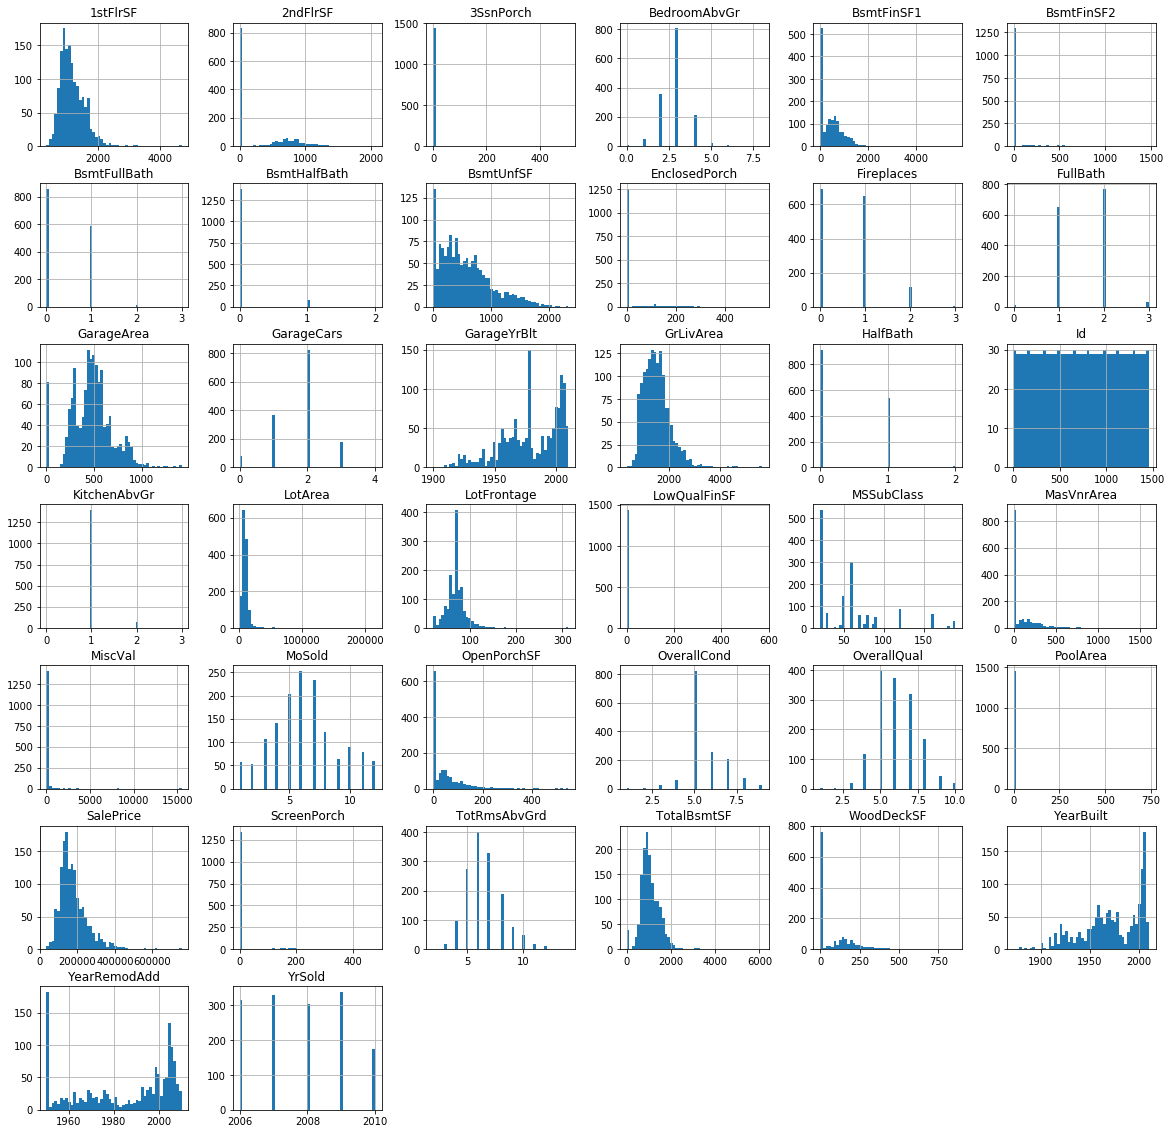

In [25]:
train_data.hist(bins=50,figsize=(20,20))
plt.show()

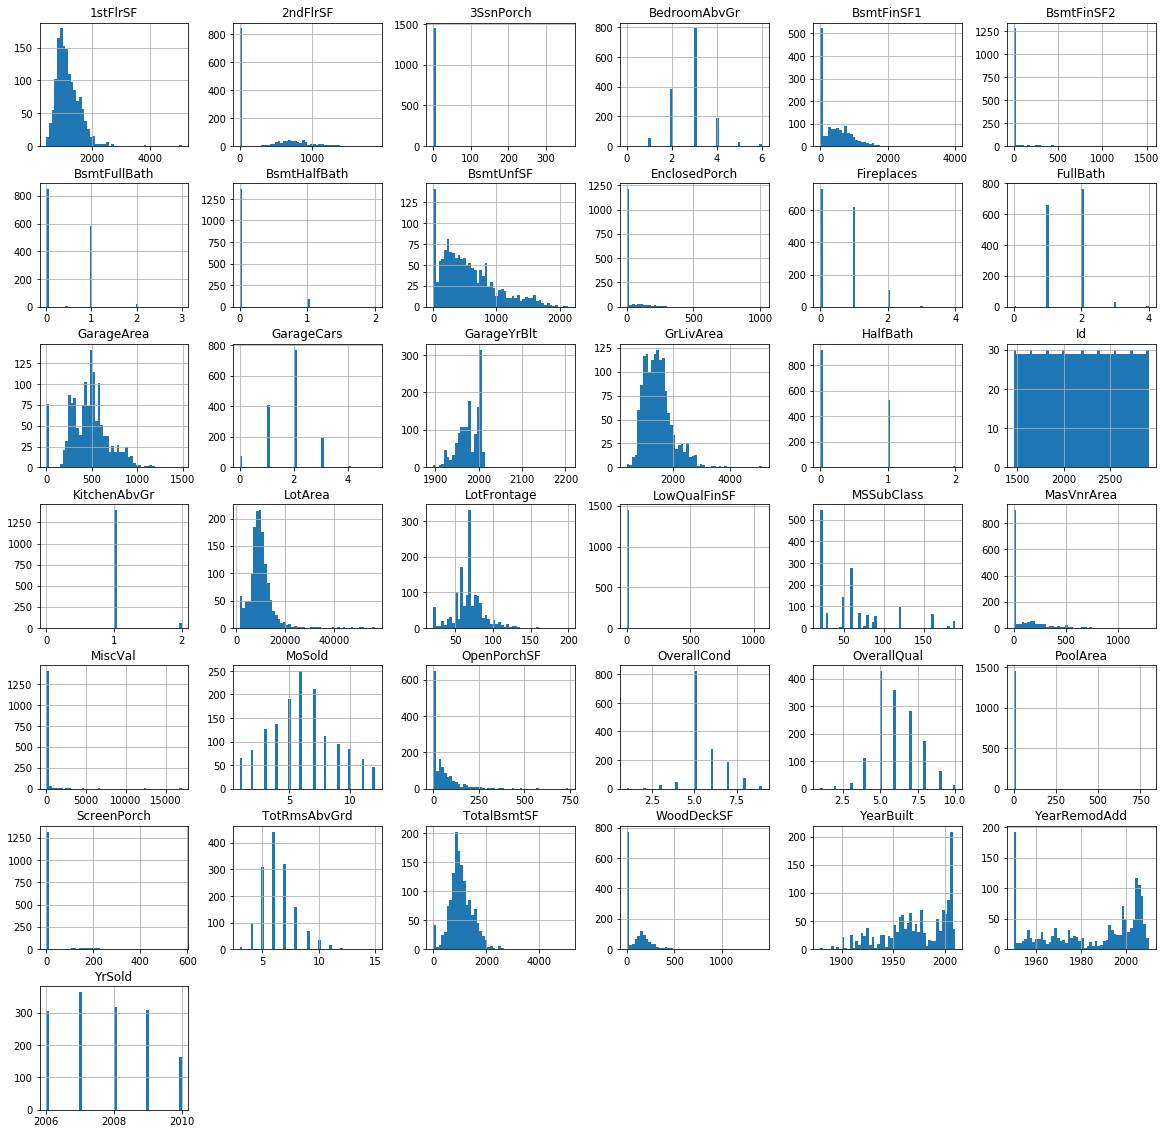

In [26]:
test_data.hist(bins=50,figsize=(20,20))
plt.show()

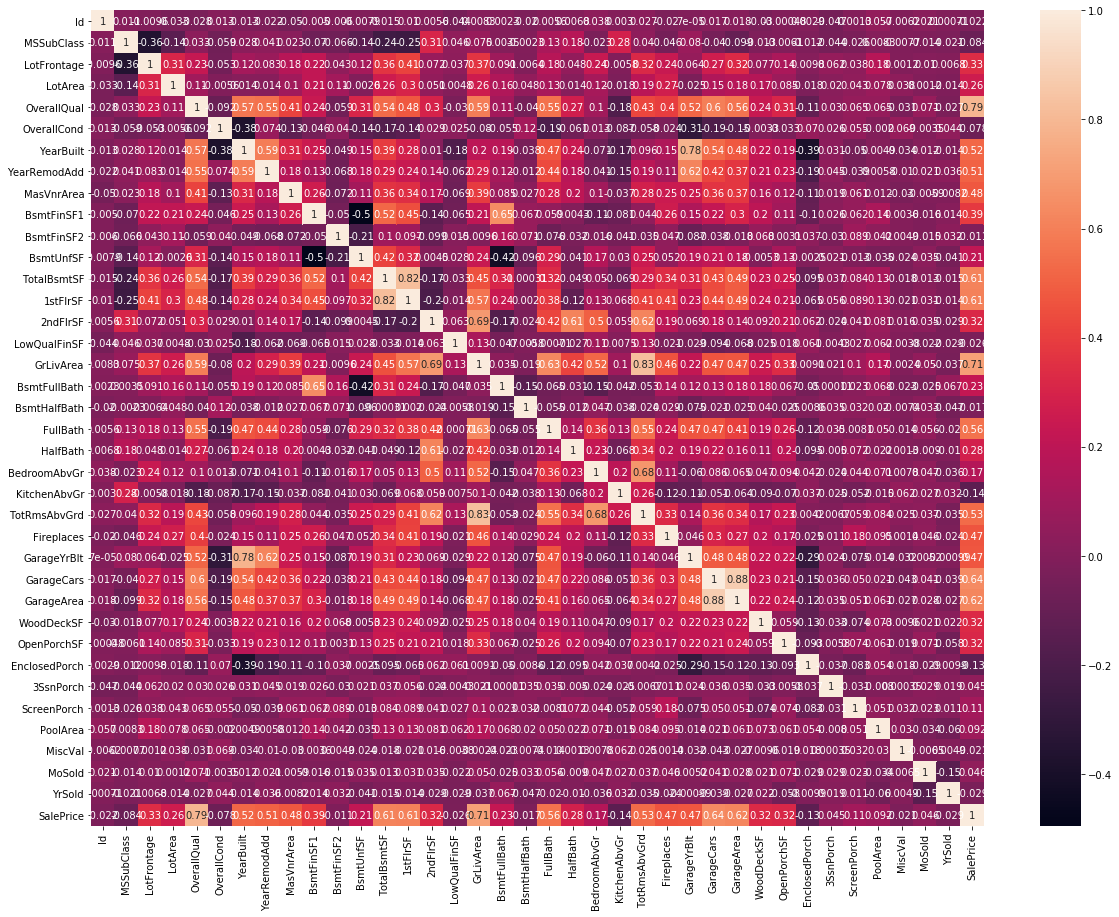

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)

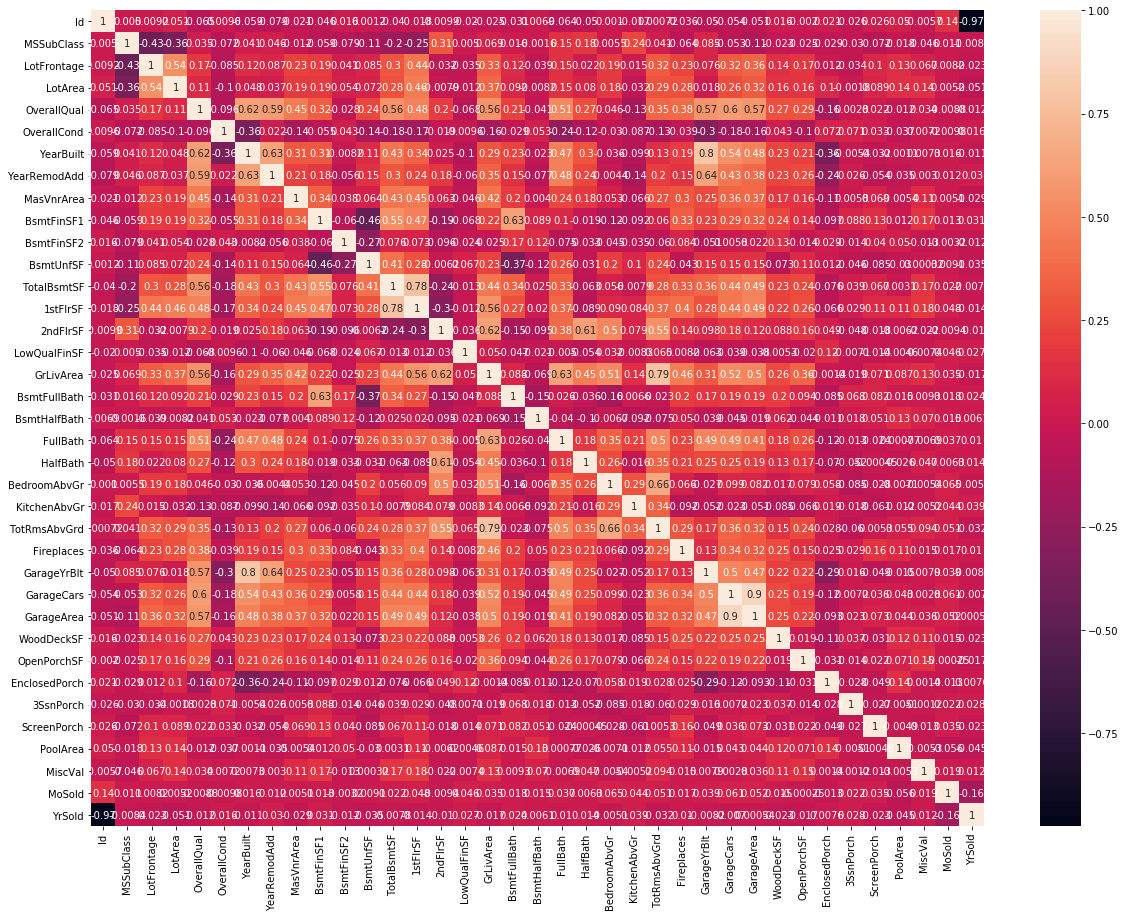

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(test_data.corr(),annot=True)

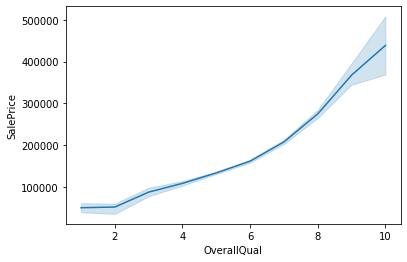

In [29]:
sns.lineplot(train_data['OverallQual'],train_data['SalePrice'])

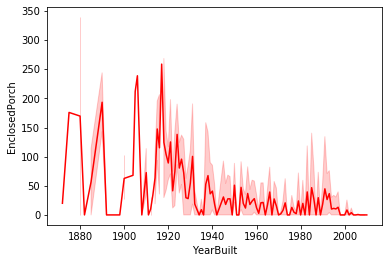

In [30]:
sns.lineplot(train_data['YearBuilt'],train_data['EnclosedPorch'],c='red')

Now dealing with categorical values

In [31]:
cat_col_train = [col for col in train_data.columns if train_data[col].dtype == 'object']

In [32]:
cat_col_train

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for a in cat_col_train:
    train_data[a] = le.fit_transform(train_data[a])

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
cat_col_test = [col for col in test_data.columns if test_data[col].dtype == 'object']

In [36]:
cat_col_test

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [37]:
for a in cat_col_test:
    test_data[a] = le.fit_transform(test_data[a])

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

At this point all categorical data is converted into numerical data

In [39]:
X = train_data.iloc[:,:-1]
y=  train_data.iloc[:,-1]
X_test = test_data.iloc[:]

# Splitting the data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=0)

In [42]:
print("Shape of xtrain: ",xtrain.shape)
print("Shape of xtest: ",xtest.shape)
print("Shape of ytrain: ",ytrain.shape)
print("Shape of ytest: ",ytest.shape)

Shape of xtrain:  (1168, 75)
Shape of xtest:  (292, 75)
Shape of ytrain:  (1168,)
Shape of ytest:  (292,)


# Model

In [43]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()

In [44]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [45]:
pred_train = lin.predict(xtrain)
pred_test = lin.predict(xtest)

In [46]:
lin.score(xtrain,ytrain)

0.885878959860062

In [47]:
final_pred = lin.predict(X_test)
test_data['SalePrice'] = final_pred
test_data[['Id','SalePrice']].head()

,Id,SalePrice
0,1461,126667.782129
1,1462,201868.410865
2,1463,182531.999085
3,1464,189686.383041
4,1465,185658.581921


In [48]:
submission = test_data[['Id','SalePrice']]

In [49]:
submission.head()

,Id,SalePrice
0,1461,126667.782129
1,1462,201868.410865
2,1463,182531.999085
3,1464,189686.383041
4,1465,185658.581921


In [50]:
submission.to_csv('house_pricing_submission.csv', index=False)